<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/regularization_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.datasets.mnist import load_data

In [70]:
trainds, testds = load_data()
x_train, y_train = trainds
x_test, y_test = testds

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


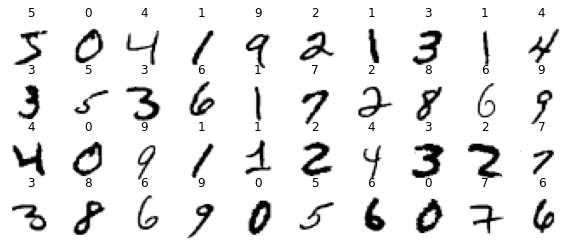

In [71]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(10, 4))
c = 10
for i in range(4):
    for j in range(c):
        plt.subplot(4, c, i * c + j + 1)
        plt.axis("off")
        plt.imshow(x_train[i * c + j], cmap="Greys")
        plt.title(f"{y_train[i*c + j]}")

plt.show()

In [72]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train[0][10:20, 10:14])

[[0.00392157 0.60392157 0.99215686 0.35294118]
 [0.         0.54509804 0.99215686 0.74509804]
 [0.         0.04313725 0.74509804 0.99215686]
 [0.         0.         0.1372549  0.94509804]
 [0.         0.         0.         0.31764706]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.15294118 0.58039216]]


In [73]:
print(y_train[0])

5


## Keral Neural Network

In [75]:
model = Sequential([Flatten(input_shape=(28, 28)),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    Dense(10, activation='softmax')])

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
result = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2937 - accuracy: 0.9145
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1428 - accuracy: 0.9582
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1076 - accuracy: 0.9676
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0865 - accuracy: 0.9730
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0733 - accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0651 - accuracy: 0.9798
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0591 - accuracy: 0.9813
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0522 - accuracy: 0.9831
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0473 - accuracy: 0.9844
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.043

In [79]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0669 - accuracy: 0.9803


[0.06693858653306961, 0.9803000092506409]

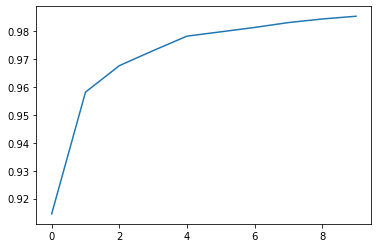

In [80]:
plt.plot(result.history["accuracy"])

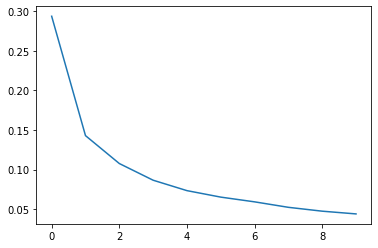

In [81]:
plt.plot(result.history["loss"])

In [82]:
y_hat = model.predict(x_test)

In [83]:
y_hat = y_hat.argmax(axis=1)

In [84]:
import sklearn.metrics as metrics
import seaborn as sns

In [85]:
cm = metrics.confusion_matrix(y_test, y_hat)
print(cm)

[[ 969    0    2    0    1    0    2    1    5    0]
 [   0 1127    2    1    0    0    1    0    4    0]
 [   3    4 1004    3    1    0    2    9    6    0]
 [   1    0    2  996    0    3    0    3    2    3]
 [   1    0    2    1  963    0    4    2    0    9]
 [   2    0    0    8    1  870    3    1    5    2]
 [   4    3    1    1    6    4  936    0    3    0]
 [   1    3    9    1    1    0    0 1008    1    4]
 [   2    1    3    5    5    1    0    4  951    2]
 [   1    6    0    5    9    1    0    5    3  979]]


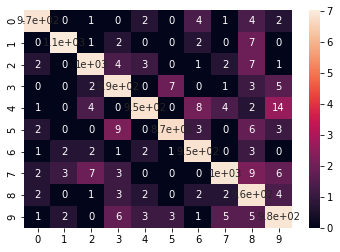

In [60]:
cm2 = cm.astype(float)
cm2[cm2 == 0] = 1
sns.heatmap(np.log(cm2), annot=cm)

In [87]:
y_hat = model.predict(x_test)
metrics.top_k_accuracy_score(y_test, y_hat, k=3)

0.9981

# Precision

$$
precision = \frac{TP}{TP+FP}
$$

# Recall

$$
recall = \frac{TP}{TP + FN}
$$

# $F_1$

$$
F_1 = 2 \frac{precision*recall}{precision+recall}
$$